In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='gulim')
plt.rc("axes", unicode_minus = False)

In [6]:
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:, -1]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [9]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size= 0.2
)

In [10]:
ss = StandardScaler()
ss.fit(train_X)

train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_scaled, train_y)
print("Train acc = {:.4f}".format(knn.score(train_scaled, train_y)))
print("Test acc = {:.4f}".format(knn.score(test_scaled, test_y)))  # test_y로 수정


Train acc = 0.9750
Test acc = 0.9667


In [12]:
## Attribute
print("classes = ", knn.classes_)
# print("feature names = ", knn.feature_names_in_)
print("metric = ", knn.effective_metric_)
print("sample = ", knn.n_samples_fit_)
print("n neighbors = ", knn.n_neighbors)


classes =  ['setosa' 'versicolor' 'virginica']
metric =  euclidean
sample =  120
n neighbors =  5


In [13]:
## 
wine = pd.read_csv("https://bit.ly/wine-date")
print(wine.head())
print(wine.info())


   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None


In [14]:
wine["class"] = wine["class"].astype("int32").astype("category")
wine.info()
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   alcohol  6497 non-null   float64 
 1   sugar    6497 non-null   float64 
 2   pH       6497 non-null   float64 
 3   class    6497 non-null   category
dtypes: category(1), float64(3)
memory usage: 158.8 KB


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


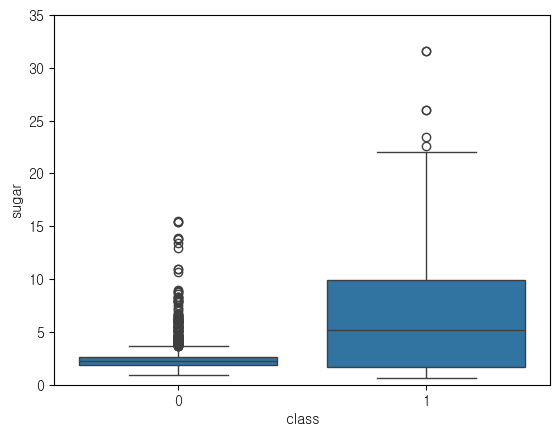

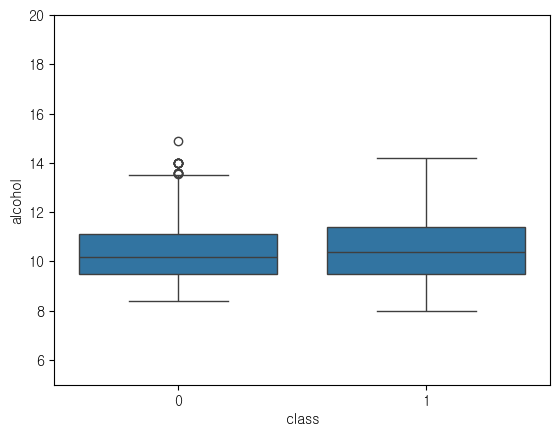

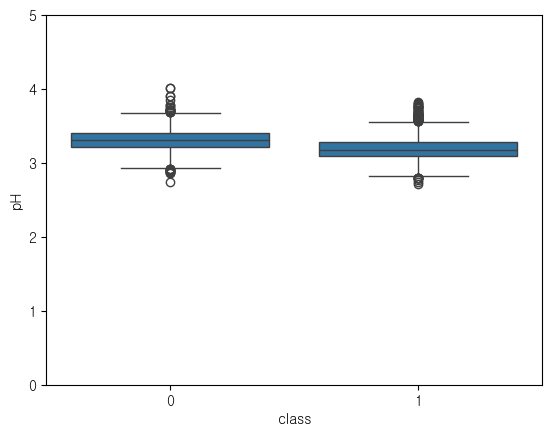

In [15]:
sns.boxplot(wine, x = "class", y = "sugar")
plt.ylim(0, 35)
plt.show()

sns.boxplot(wine, x = "class", y = "alcohol")
plt.ylim(5, 20)
plt.show()

sns.boxplot(wine, x = "class", y = "pH")
plt.ylim(0, 5)
plt.show()

In [16]:
# wine.head()
X = wine.iloc[:, :-1]
y = wine.iloc[:, -1]

print(X.shape)
print(y.shape)


(6497, 3)
(6497,)


In [17]:
# Split
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2
)

print("train shape = ", train_X.shape)
print("test shape = ", test_X.shape)


train shape =  (5197, 3)
test shape =  (1300, 3)


In [18]:
## Scaling
standScaler = StandardScaler()
standScaler.fit(train_X)

print(standScaler.mean_)  # 인스턴스에서 mean_ 속성에 접근
print(standScaler.scale_)  # 인스턴스에서 scale_ 속성에 접근

# fit 후 transform을 호출할 때 인스턴스를 함수처럼 호출하지 않도록 수정
train_scaled = standScaler.transform(train_X) 
test_scaled = standScaler.transform(test_X)


[10.48861587  5.42600539  3.22006927]
[1.19147009 4.75797939 0.16057009]


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier(criterion="gini", max_depth= 5)
dt.fit(train_scaled, train_y)

print("Train acc = ", dt.score(train_scaled, train_y))
print("Test acc = ", dt.score(test_scaled, test_y))



Train acc =  0.8737733307677507
Test acc =  0.8546153846153847


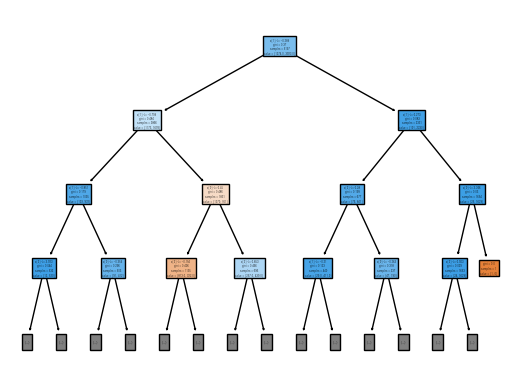

In [21]:
from sklearn.tree import plot_tree

plot_tree(dt, max_depth= 3, filled= True)
plt.show()

In [22]:
print(dt.feature_importances_)

pd.DataFrame(dt.feature_importances_, index=train_X.columns)

[0.15438871 0.71593253 0.12967876]


,0
alcohol,0.154389
sugar,0.715933
pH,0.129679


In [23]:
## 교차검증 (Cross validation, cv)
from sklearn.model_selection import cross_validate,StratifiedKFold, GridSearchCV


In [24]:
cv_X_scaled = ss.fit_transform(X)

In [25]:
splitter = StratifiedKFold(n_splits=5, shuffle= True)
cv_result = cross_validate(dt, cv_X_scaled, y, cv=splitter)

In [26]:
cv_result = cross_validate(dt, train_scaled, train_y,cv=5)

In [27]:
print(cv_result["test_score"].mean())

0.8668484859702377


In [28]:
## GridSearch
dt = DecisionTreeClassifier()

params = {
    "min_impurity_decrease":np.arange(0.001, 0.01, 0.0001),
    "max_depth":np.arange(5, 30, 1),
    "min_samples_split": np.arange(2, 100, 10)
}
splitter = StratifiedKFold(n_splits=5, shuffle= True)
# cv_result = cross_validate(dt, cv_X_scaled, y, cv = splitter)

grid_cv = GridSearchCV(dt,
                    param_grid=params,
                    cv = splitter)

grid_cv.fit(cv_X_scaled, y)
# print(grid_cv.cv_results_)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_impurity_decrease': array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0...
       0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064, 0.0065,
       0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072, 0.0073,
       0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 , 0.0081,
       0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089,
       0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099]),
                         'min_samples_split': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])})

In [29]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_impurity_decrease', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [30]:
print(grid_cv.best_params_)
print(np.mean(grid_cv.cv_results_["mean_test_score"]))

{'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 52}
0.8578539937756195


In [31]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV

In [32]:
rf = RandomForestClassifier(n_estimators=100)

In [33]:
cv_X_scaled = ss.fit_transform(X)
y

print(cv_X_scaled.shape)
print(y.shape)

(6497, 3)
(6497,)


In [134]:
params = {
    "n_estimators" : [50, 80, 100, 120],
    "max_depth" : [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits=5, shuffle= True)
grid_rf = GridSearchCV(rf,param_grid=params, cv=splitter)
grid_rf.fit(cv_X_scaled, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12, 15],
                         'n_estimators': [50, 80, 100, 120]})

In [135]:
print(grid_rf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [136]:
print(grid_rf.best_params_)
print(grid_rf.cv_results_["mean_test_score"])
print(grid_rf.best_score_)

{'max_depth': 15, 'n_estimators': 100}
[0.82514976 0.82360964 0.82361106 0.82407615 0.85685865 0.85778184
 0.85993569 0.85901178 0.87040066 0.87070883 0.8676306  0.86932386
 0.87686516 0.87717428 0.87825167 0.87963617 0.89364197 0.89395109
 0.89502754 0.89148718 0.89595061 0.89702801 0.8991847  0.89856825]
0.8991846982886245


In [137]:
rf_best = RandomForestClassifier(n_estimators=120,
                            max_depth = 15)
rf_best.fit(cv_X_scaled, y)

RandomForestClassifier(max_depth=15, n_estimators=120)

In [138]:
print(rf_best.feature_importances_)
print(rf_best.score(cv_X_scaled,y))

[0.22292465 0.51708484 0.25999052]
0.9909188856395259


In [139]:
##
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
gb = GradientBoostingClassifier()

# params = {
#     "n_estimators": [50, 80, 100, 120],
#     "max_depth": [3, 5, 7, 9, 12, 15]
# }

splitter = StratifiedKFold(n_splits=5, shuffle = True)
cv_score = cross_validate(gb, cv_X_scaled, y, cv = splitter)
# print(np.mean(cv_score["train_score"]))
print(np.mean(cv_score["test_score"]))

0.8667088292769586


In [ ]:
print(grid_gb.best_params_)
print(grid_gb.cv_results_["mean_test_score"])
print(grid_gb.best_score_)

In [76]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [92]:
titanic_df = titanic.loc[:,:"fare"]
titanic.dropna(subset=["age"],axis = 0, inplace=True)

In [94]:
## DT, rf, gb survived == 1 alive
X = titanic.loc[:, "pclass":"fare"]
y = titanic["survived"]

print("X shape = ", X.shape)
print("y shape = ", y.shape)

X.head()

X shape =  (714, 6)
y shape =  (714,)


,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [ ]:
X = pd.get_dummies(X,columns= ["sex"],drop_first= True)
print(X.head())


In [97]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [98]:
##
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold

In [99]:
## dt
dt = DecisionTreeClassifier()

params = {
    "max_depth": range(3,20,1),
    "max_leaf_nodes": range(3,20,1) 
}

splitter = StratifiedKFold(n_splits=5, shuffle= True)

gs_dt = GridSearchCV(dt,param_grid=params,cv=splitter)
gs_dt.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'max_leaf_nodes': range(3, 20)})

In [100]:
print("Best parameter = ",gs_dt.best_estimator_)
print("cv score = {:4f} ".format(gs_dt.best_score_))


Best parameter =  DecisionTreeClassifier(max_depth=7, max_leaf_nodes=19)
cv score = 0.823589 


In [102]:
## rf
rf = RandomForestClassifier()

params = {
    "n_estimators" : range(90, 120, 1),
    "max_depth" : range(3, 15, 1)

}

splitter = StratifiedKFold(n_splits=5, shuffle= True)
grid_rf = GridSearchCV(rf, param_grid=params, cv = splitter)
grid_rf.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 15),
                         'n_estimators': range(90, 120)})

In [103]:
print("Best parameter = ",grid_rf.best_estimator_)
print("cv score = {:4f} ".format(grid_rf.best_score_))


Best parameter =  RandomForestClassifier(max_depth=9, n_estimators=107)
cv score = 0.826307 


In [105]:
## gb

gb = GradientBoostingClassifier()

params = {
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "max_depth" : range(3, 5, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle= True)

grid_gb = GridSearchCV(gb, param_grid=params, cv= splitter)
grid_gb.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 5)})

In [107]:
print("Best parameter = ",grid_gb.best_estimator_)
print("cv score = {:4f} ".format(grid_gb.best_score_))

Best parameter =  GradientBoostingClassifier()
cv score = 0.812351 


In [109]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [111]:
##
wine = pd.read_csv("https://bit.ly/wine-date")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [112]:
wine["class"] = wine["class"].astype("int32").astype("category")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [113]:
X = wine.iloc[:,:-1]
y = wine["class"]

In [116]:
## 
standScaler = StandardScaler()
X_scaled = standScaler.fit_transform(X)
X_scaled[:10]

array([[-0.91546416, -0.7447781 ,  1.81308951],
       [-0.58006813, -0.59764007, -0.11507303],
       [-0.58006813, -0.66069923,  0.25811972],
       [-0.58006813, -0.7447781 , -0.3638682 ],
       [-0.91546416, -0.7447781 ,  1.81308951],
       [-0.91546416, -0.76579782,  1.81308951],
       [-0.91546416, -0.80783726,  0.50691489],
       [-0.41237012, -0.89191614,  1.06670401],
       [-0.83161516, -0.72375839,  0.88010764],
       [ 0.00687492,  0.13805008,  0.81790884]])

In [114]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr = LogisticRegression(max_iter= 100)

splitter = StratifiedKFold(n_splits=5, shuffle= True)
scores = cross_validate(lr, X_scaled,y, cv=splitter)

In [118]:
print(scores["test_score"])


[0.77846154 0.78230769 0.78214011 0.77136259 0.78367975]


In [119]:
lr.fit(X_scaled, y)

LogisticRegression()

In [121]:
print("probability = \n",lr.predict_proba(X_scaled[:10]))
print("coefficient = \n", lr.coef_, lr.intercept_)
print("classes = \n", lr.classes_)

probability = 
 [[0.77202535 0.22797465]
 [0.3608078  0.6391922 ]
 [0.44961173 0.55038827]
 [0.37654449 0.62345551]
 [0.77202535 0.22797465]
 [0.77810814 0.22189186]
 [0.59800521 0.40199479]
 [0.66068716 0.33931284]
 [0.61725242 0.38274758]
 [0.19105714 0.80894286]]
coefficient = 
 [[ 0.53227906  1.65998624 -0.70993564]] [1.79099774]
classes = 
 [0 1]
